RAINFALL ANOMALY INDEX (RAI)
---

--------------------

Rainfall Anomaly Index is a climate index developed by Van Rooy (1965) to measure the postive and negative severities of rainfall anomalies





<img src="rai.jpg">

Import Necessary Lib
---

In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib as mpl
import pymannkendall as mk
from scipy import stats as st
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cf
from cartopy.feature import BORDERS
from matplotlib.gridspec import GridSpec
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings('ignore')

### Generating the map of the study Area

Text(0.5, 1.0, 'MAP OF STUDY AREA')

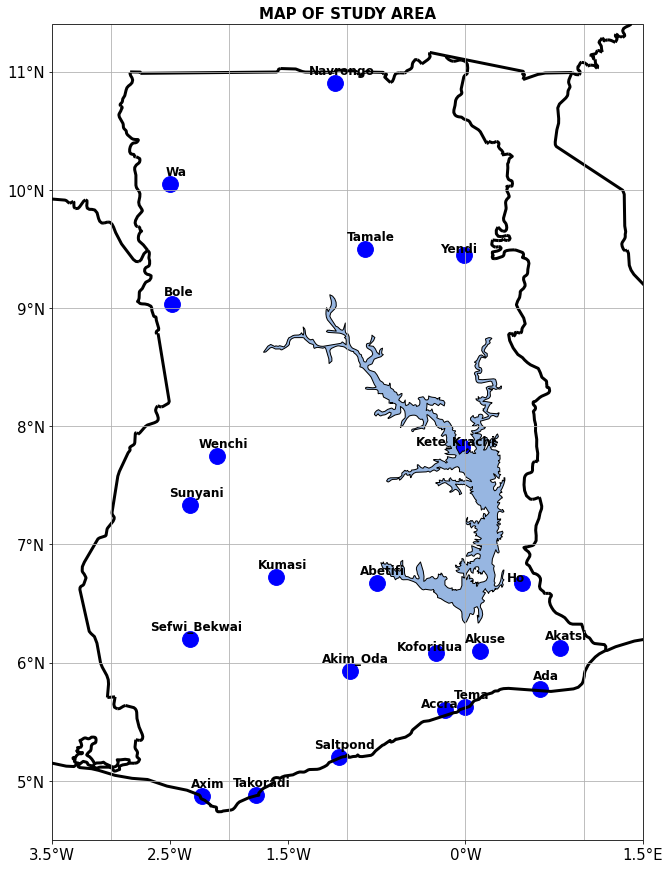

In [4]:
dat = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'st', 'zone'])

plt.figure(figsize=(15,15))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.add_feature(cf.COASTLINE,lw =3)
ax.add_feature(cf.BORDERS, lw=3)
#ax.add_feature(cf.LAND)
ax.set_extent([-3.5,1.2,11.4,4.5])
#ax.stock_img()
#ax.add_feature(cf.STATES, alpha= 0.1)
ax.add_feature(cf.LAKES, edgecolor='black')
#ax.plot(dat.Longitude, dat.Latitude, 'ro', ms=5)#, transform=ccrs.Geodetic(),label='Synoptic stations')


s_stations = np.asarray(dat.Station)

plt.scatter(
    x= dat["Longitude"],
    y=dat["Latitude"],
    color="blue",
    s=250,
    alpha=1,
    transform=ccrs.PlateCarree()
)


ax.gridlines()

for lg, lt, name in zip(dat.Longitude, dat.Latitude, s_stations):
    if name in ['Koforidua', 'Accra','Ho','Yendi','Kete_Krachi']:
        ax.text(lg - .05, lt + .05, 
                name, 
                va='center', 
                ha='center', transform=ccrs.Geodetic(), color = 'k', fontsize= 12, fontweight = 'bold')
    else:    
        ax.text(lg + .05, lt + .05, 
                name, 
                va='bottom', 
                ha='center', transform=ccrs.Geodetic(), color = 'k', fontsize= 12, fontweight = 'bold')


a = ax.set_xticks([-3.5,-2.5,-1.5,0,1.5], crs=ccrs.PlateCarree())
ax.set_xticklabels(a,rotation=0, fontsize=15)

b = ax.set_yticks([11,10,9,8,7,6,5], crs=ccrs.PlateCarree())
ax.set_yticklabels(b, rotation=0, fontsize=15)

lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_title('MAP OF STUDY AREA', fontweight = "bold", fontsize = 15)

#plt.gcf().set_size_inches(20, 20)
                          
#plt.savefig('Map_of_study_area_new.jpg',bbox_inches = 'tight')
#plt.savefig('Map_of_study_area.png',bbox_inches = 'tight')

#### READ DATASET

In [6]:
ds_GPCC = xr.open_dataset('E:/DATASETS/GPCC/GPCC.nc')
ds_GPCC

<xarray.Dataset>
Dimensions:                       (time: 468, lon: 1440, lat: 720)
Coordinates:
  * time                          (time) datetime64[ns] 1981-01-01 ... 2019-1...
  * lon                           (lon) float64 -179.9 -179.6 ... 179.6 179.9
  * lat                           (lat) float64 89.88 89.62 ... -89.62 -89.88
Data variables:
    precip                        (time, lat, lon) float32 ...
    numgauge                      (time, lat, lon) float32 ...
    infilled_numgauges            (time, lat, lon) float32 ...
    interpolation_error           (time, lat, lon) float32 ...
    interpolation_error_infilled  (time, lat, lon) float32 ...
    diff_new_old_method           (time, lat, lon) float32 ...
Attributes: (12/20)
    CDI:                       Climate Data Interface version 1.9.10 (https:/...
    Conventions:               CF-1.4
    institution:               Deutscher Wetterdienst
    history:                   Tue Dec 14 09:38:06 2021: cdo mergetime full_d...
    title:                     GPCC Full Data Monthly Product Version 2020, p...
    summary:                   The Full Data Monthly Product is of much highe...
    ...                        ...
    time_coverage_resolution:  month
    geospatial_lat_min:        -90.
    geospatial_lat_max:        90.
    geospatial_lon_min:        -180.
    geospatial_lon_max:        180.
    CDO:                       Climate Data Operators version 1.9.10 (https:/...

#### COORDINATES OF THE GMET STATIONS

In [7]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St', 'Zone']) 
#open file conataining coordinates for the symoptic stations

#### GROUP THE DATA (YEAR AND MONTH)

In [8]:
da_ghana = ds_GPCC.sel(lon = slice(-3.5,1.5), lat = slice(11.2,4.2)).precip   #select Ghana from the global data

da_monthly_precip = da_ghana        # the data is already monthly 

da_yearly_precip = da_ghana.resample(time = 'y').sum()       #resampling the data into yearly data

Yearly_rainfall = da_monthly_precip.groupby('time.year').sum()   #grouping the data into yearly data

Yearly_rainfall_mean = da_monthly_precip.groupby('time.year').mean()   #yearly mean

monthly_precip = da_monthly_precip.groupby('time.month').mean()     # monthly data

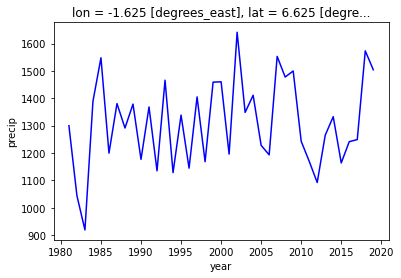

In [9]:
Yearly_rainfall.sel(lat = 6.65, lon = -1.75, method = 'nearest').plot(color = 'b')

### RAINAFLL TOTAL  FOR EACH YEAR

In [66]:
Yearly_rain =Yearly_rainfall.where(Yearly_rainfall > 0)

#### LATITUDINAL RAINFALL DISTRIBUTION

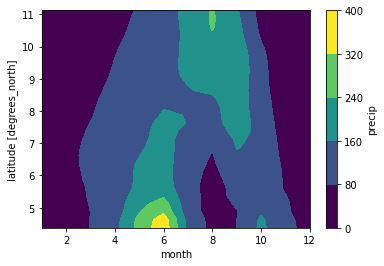

In [14]:
da_monthly_precip.groupby('time.month').mean(['time','lon']).T.plot.contourf(cmap ='viridis')

#### SELCTING 22 POINT LOC FROM THE YEARLY RAINFALL GRIDED FILE

In [15]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St', 'Zone'])
#dat#
station =  gauge.iloc[:,0]
lon = gauge.iloc[:,1]
lat = gauge.iloc[:,2]

Rainfall_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
#CHIRPS_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')

for i,j in enumerate(lon):
    
    GPCC_rain = Yearly_rainfall .sel(lat = lat[i], lon = j, method = 'nearest')
    Rainfall_stations[station[i]] = GPCC_rain


In [16]:
Rainfall_stations.head(2)

,Navrongo,Wa,Tamale,Yendi,Bole,Kete_Krachi,Wenchi,Sunyani,Kumasi,Sefwi_Bekwai,...,Akatsi,Akuse,Koforidua,Akim_Oda,Ada,Tema,Accra,Saltpond,Takoradi,Axim
Year,,,,,,,,,,,,,,,,,,,,,
1981-12-31,740.569946,749.120056,1105.969849,1289.930054,1181.400024,1229.160034,1247.549927,1327.989990,1299.790161,1361.089966,...,762.350037,1173.190063,1181.880005,1647.699951,890.750000,838.750061,842.609985,1092.079834,1408.859985,1679.270020
1982-12-31,979.989929,962.580078,1173.499878,1052.920044,1157.479858,1068.709961,967.159973,947.019958,1043.890015,1221.119873,...,991.710083,991.589905,1090.580078,1182.419922,1141.839966,852.040039,824.490051,1180.339966,1460.800049,1929.160156


### RAINFALL TIMESERIES


#### ZONAL MEAN

In [17]:
north = Rainfall_stations.iloc[:,:5].mean(axis = 1)
trans = Rainfall_stations.iloc[:,5:8].mean(axis = 1)
forest = Rainfall_stations.iloc[:,8:16].mean(axis = 1)
coast = Rainfall_stations.iloc[:,16:22].mean(axis = 1)

#### STATIONS PLOT

Text(0.5, 0, 'Year')

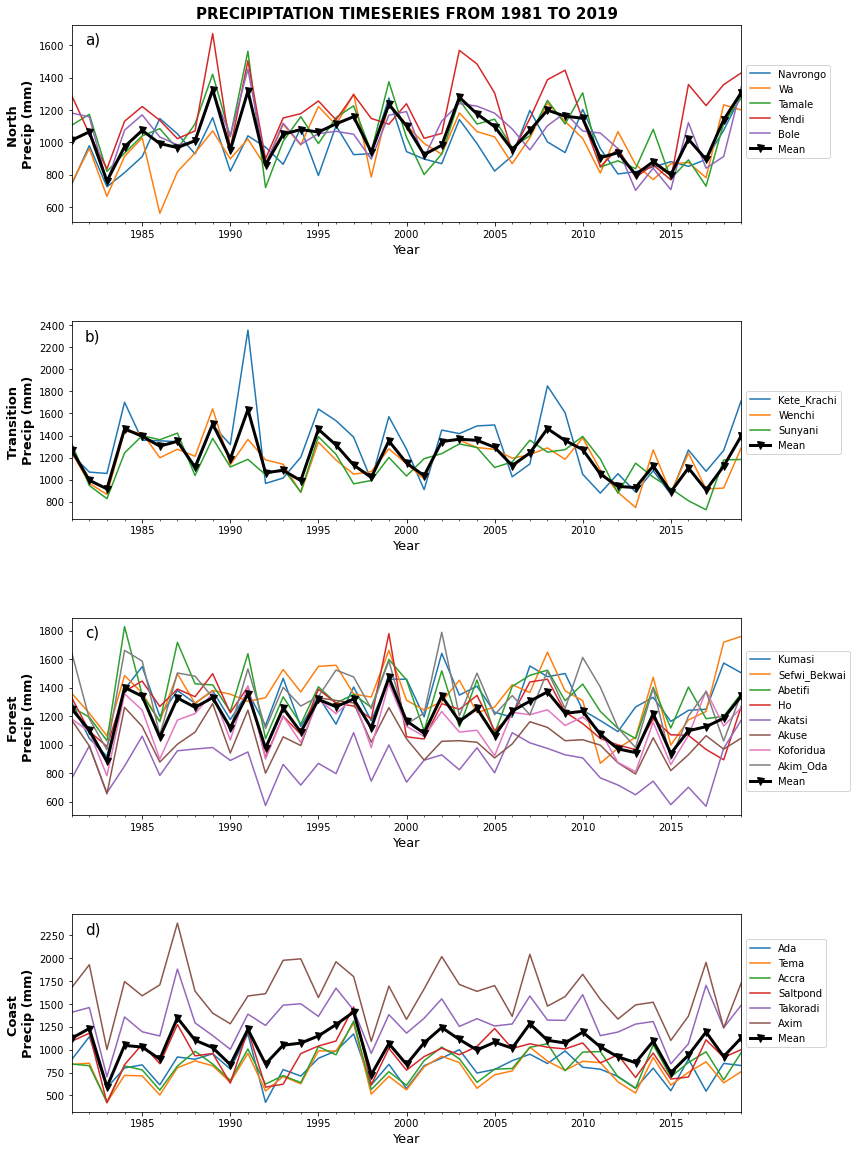

In [18]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(12,20),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

Rainfall_stations.iloc[:,:5].plot(ax = axes[0], label = 'north')
north.plot(ax=axes[0], linewidth = 3, marker = 'v', markersize = 7, label = 'Mean',color ='k')
axes[0].set_title('PRECIPIPTATION TIMESERIES FROM 1981 TO 2019',fontsize=15, fontweight = "bold")
axes[0].text(0.02,0.9, 'a)', transform = axes[0].transAxes, fontsize = 15)
axes[0].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.3))
axes[0].set_ylabel('North \nPrecip (mm)',fontsize=13, fontweight = "bold")#, fontweight = "bold")
axes[0].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")


Rainfall_stations.iloc[:,5:8].plot(ax = axes[1], label = 'Transition')
trans.plot(ax=axes[1], linewidth = 3, marker = 'v', markersize = 7, label = 'Mean',color ='k')
axes[1].text(0.02,0.9, 'b)', transform = axes[1].transAxes, fontsize = 15)
axes[1].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.3))
axes[1].set_ylabel('Transition \nPrecip (mm)',fontsize=13, fontweight = "bold")
axes[1].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")


Rainfall_stations.iloc[:,8:16].plot(ax = axes[2], label = 'Forest')
forest.plot(ax=axes[2], linewidth = 3, marker = 'v', markersize = 7, label = 'Mean',color ='k')
axes[2].text(0.02,0.9, 'c)', transform = axes[2].transAxes, fontsize = 15)
axes[2].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))
axes[2].set_ylabel('Forest \nPrecip (mm)',fontsize=13, fontweight = "bold")
axes[2].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")


Rainfall_stations.iloc[:,16:22].plot(ax = axes[3], label = 'Coast')
coast.plot(ax=axes[3], linewidth = 3, marker = 'v', markersize = 7,label = 'Mean',color ='k')
#axes[3].set_title('Precipitation Trend Of The Coastal Zone',fontsize=15)
axes[3].text(0.02,0.9, 'd)', transform = axes[3].transAxes, fontsize = 15)
axes[3].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.3))
axes[3].set_ylabel('Coast \nPrecip (mm)',fontsize=13, fontweight = "bold")
axes[3].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")


#plt.savefig('precip_trend1.pdf')
#plt.savefig('precip_trend1.jpg')

### Mean trends

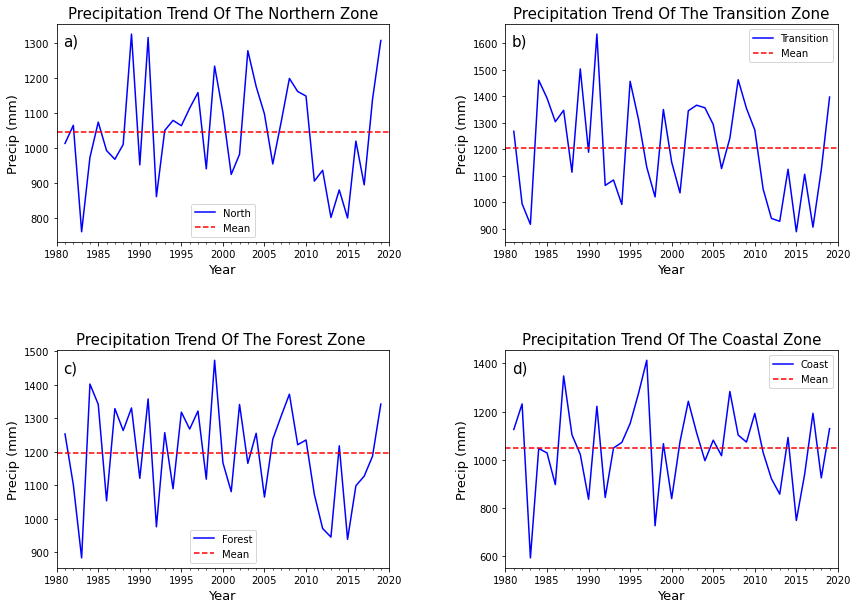

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14,10),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

#axes[0,0].set_ylabel('FOREST \nRAI',fontsize=12, fontweight = "bold")
north.plot(ax = axes[0,0],color = 'b', label = 'North')
axes[0,0].axhline(y=1044.7095947265625, color='r', linestyle='dashed', alpha=1, label = 'Mean')
axes[0,0].set_title('Precipitation Trend Of The Northern Zone',fontsize=15)
axes[0,0].text(0.02,0.9, 'a)', transform = axes[0,0].transAxes, fontsize = 15)

trans.plot(ax = axes[0,1], color = 'b', label = 'Transition')
axes[0,1].axhline(y=1205.509033203125, color='r', linestyle='dashed', alpha=1, label = 'Mean')
axes[0,1].set_title('Precipitation Trend Of The Transition Zone',fontsize=15)
axes[0,1].text(0.02,0.9, 'b)', transform = axes[0,1].transAxes, fontsize = 15)


forest.plot(ax = axes[1,0], color = 'b', label = 'Forest')
axes[1,0].axhline(y=1194.48681640625, color='r', linestyle='dashed', alpha=1, label = 'Mean')
axes[1,0].set_title('Precipitation Trend Of The Forest Zone ',fontsize=15)
axes[1,0].text(0.02,0.9, 'c)', transform = axes[1,0].transAxes, fontsize = 15)

coast.plot(ax = axes[1,1], color = 'b', label = 'Coast')
axes[1,1].axhline(y=1048.571533203125, color='r', linestyle='dashed', alpha=1, label = 'Mean')
axes[1,1].set_title('Precipitation Trend Of The Coastal Zone',fontsize=15)
axes[1,1].text(0.02,0.9, 'd)', transform = axes[1,1].transAxes, fontsize = 15)

ax = axes.flatten()
for ax in axes:
    #ax[0].axhline(y=90, color='r', linestyle='dashed', alpha=1)
    #ax[0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    
    
    ax[0].set_ylabel('Precip (mm)',fontsize=13)#, fontweight = "bold")
    ax[1].set_ylabel('Precip (mm)',fontsize=13)#, fontweight = "bold")
  

    ax[0].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[1].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[0].set_xlim('1980', '2020')
    ax[1].set_xlim('1980', '2020')
    ax[0].legend(loc = 'lower center')
    ax[1].legend()
    
#plt.savefig('precip_trend.pdf')
#plt.savefig('precip_trend.jpg')

### TRENDLINE

In [20]:
def trend(data):
    x = data.index.year
    y = data.values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    return x, p(x)


In [21]:
n,pn = trend(north)
t, pt = trend(trans)
f, pf = trend(forest)
c, pc = trend(coast)

In [22]:
northT = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
northT['Trend'] = pn

transT = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
transT['Trend'] = pt

forestT = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
forestT['Trend'] = pf

coastT = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
coastT['Trend'] = pc


In [23]:
#a = mk.original_test(north)
#b = mk.original_test(trans).slope
#c = mk.original_test(forest).slope
#d = mk.original_test(coast).slope
#print(a)

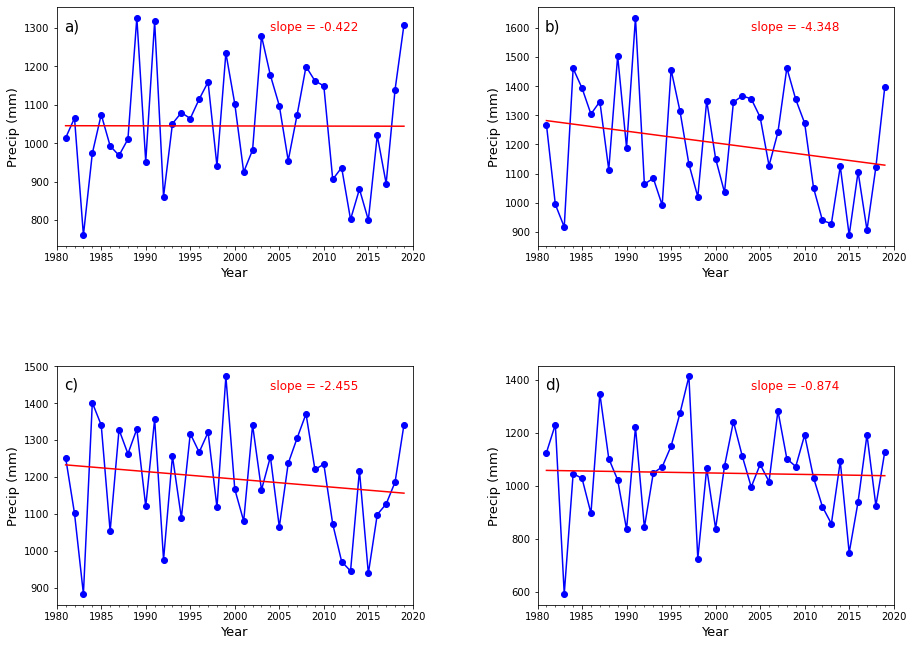

In [27]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,11),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

#plt.suptitle('PRECIPITATION TRENDS',fontsize=20, fontweight = 'bold')
north.plot(ax = axes[0,0], marker = 'o',color = 'b', label = 'North')
northT.plot(ax = axes[0,0],color = 'r', legend = False)
#axes[0,0].set_title('Precipitation Trend Of The Northern Zone',fontsize=15)
axes[0,0].text(0.02,0.9, 'a)', transform = axes[0,0].transAxes, fontsize = 15)
axes[0,0].text(0.6,0.9, 'slope = -0.422', color= 'r', transform = axes[0,0].transAxes, fontsize = 12)


trans.plot(ax = axes[0,1], marker = 'o',color = 'b', label = 'Transition')
transT.plot(ax = axes[0,1],color = 'r', legend = False)
#axes[0,1].set_title('Precipitation Trend Of The Transition Zone',fontsize=15)
axes[0,1].text(0.02,0.9, 'b)', transform = axes[0,1].transAxes, fontsize = 15)
axes[0,1].text(0.6,0.9, 'slope = -4.348', color= 'r', transform = axes[0,1].transAxes, fontsize = 12)


forest.plot(ax = axes[1,0],marker = 'o',color = 'b', label = 'Forest')
forestT.plot(ax = axes[1,0],color = 'r', legend = False)
#axes[1,0].set_title('Precipitation Trend Of The Forest Zone ',fontsize=15)
axes[1,0].text(0.02,0.9, 'c)', transform = axes[1,0].transAxes, fontsize = 15)
axes[1,0].text(0.6,0.9, 'slope = -2.455', color= 'r', transform = axes[1,0].transAxes, fontsize = 12)


coast.plot(ax = axes[1,1], marker = 'o',color = 'b', label = 'Coast')
coastT.plot(ax = axes[1,1],color = 'r', legend = False)
#axes[1,1].set_title('Precipitation Trend Of The Coastal Zone',fontsize=15)
axes[1,1].text(0.02,0.9, 'd)', transform = axes[1,1].transAxes, fontsize = 15)
axes[1,1].text(0.6,0.9, 'slope = -0.874', color= 'r', transform = axes[1,1].transAxes, fontsize = 12)


ax = axes.flatten()
for ax in axes:
    #ax[0].axhline(y=90, color='r', linestyle='dashed', alpha=1)
    #ax[0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    
    
    ax[0].set_ylabel('Precip (mm)',fontsize=13)#, fontweight = "bold")
    ax[1].set_ylabel('Precip (mm)',fontsize=13)#, fontweight = "bold")
  

    ax[0].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[1].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[0].set_xlim('1980', '2020')
    ax[1].set_xlim('1980', '2020')
    #ax[0].legend()
    #ax[1].legend()
    
#plt.savefig('precip_trend2.pdf')
#plt.savefig('precip_trend2.jpg')
#plt.savefig('precip_trend2.png')

#### RAINFALL TIMESERIES FOR THE STATIONS

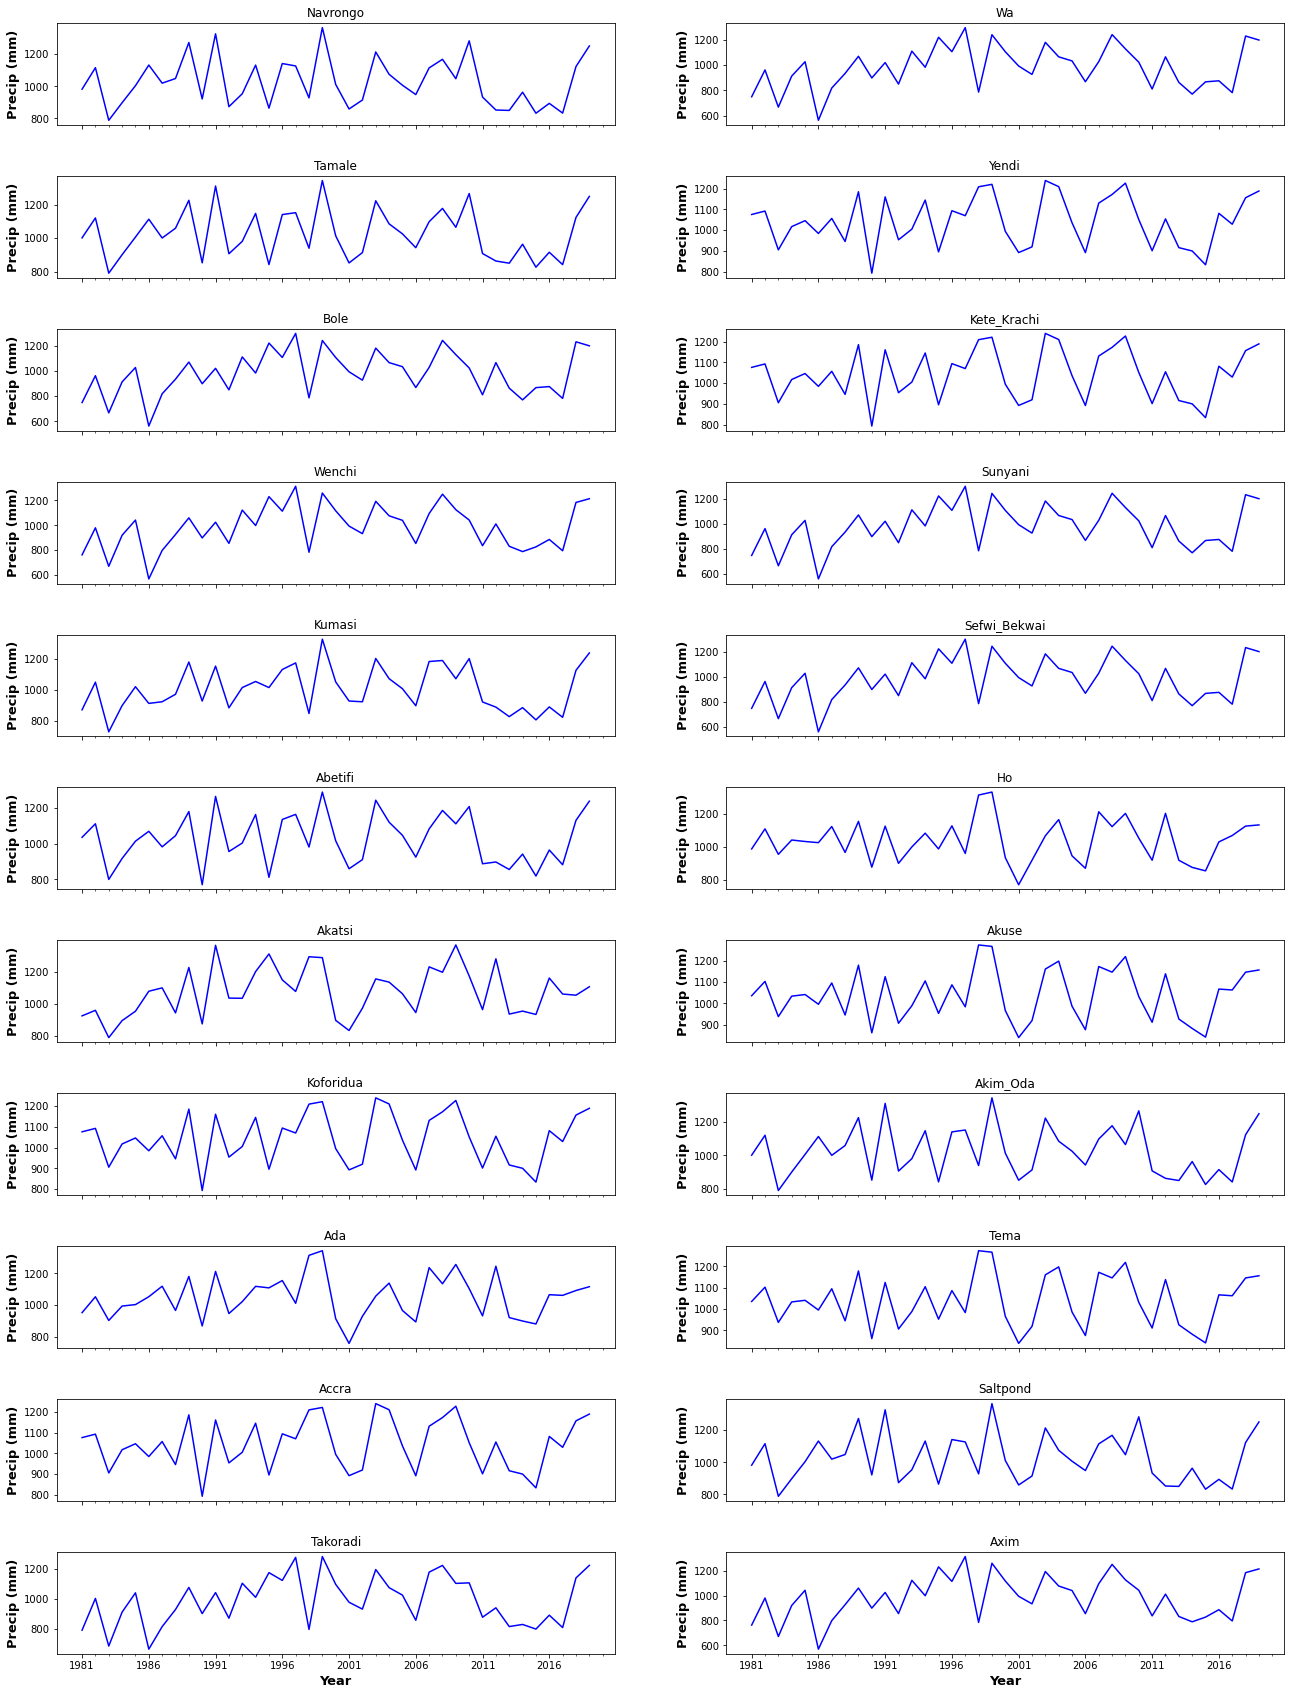

In [19]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St', 'Zone'])
#dat#
ticks = ['1981','1981', '1986','1991','1996', '2001','2006','2011', '2016', '2021', '2021']
fig, axes = plt.subplots(nrows = 11, ncols = 2, figsize = (22,30), sharex = True)
plt.subplots_adjust(hspace = 0.5)#bottom=0.5, right=0.8, wspace=0.5)
axes[10,0].set_xlabel('Year', fontsize = 13, fontweight = 'bold')
axes[10,1].set_xlabel('Year', fontsize = 13, fontweight = 'bold')
ax = axes.flatten()
for i in range(22):
    station = gauge.iloc[i,0]
    lon = gauge.iloc[i,1]
    lat = gauge.iloc[1,2]
    rainfall = Yearly_rainfall .sel(lat = lat, lon = lon, method = 'nearest')
    ax[i].plot(rainfall, color = 'b')
    ax[i].set_title(station)
    #ax[i].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    ax[i].set_xticks(np.arange(1,40),1)
    ax[i].set_xticklabels(ticks)#,rotation=90)
    #ax[i].set_ylim(0,2500)
    ax[i].set_ylabel('Precip (mm)', fontsize = 13, fontweight = 'bold')
    
    
#plt.savefig('Rainfall_TIMESERIES.png')
#plt.savefig('RAInfall_TIMESERIES.pdf')
#plt.savefig('RAInfall_TIMESERIES.jpg')

### DISTRIBUTION OF MEAN RAINFALL ALONG THE LATITUDE

#### MONTHLY RAINFALL DISTRIBUTION IN GHANA

In [28]:
mm = monthly_precip.mean('lon').T

Text(0.5, 1.0, 'ZONAL DISTRIBUTION OF RAINFALL')

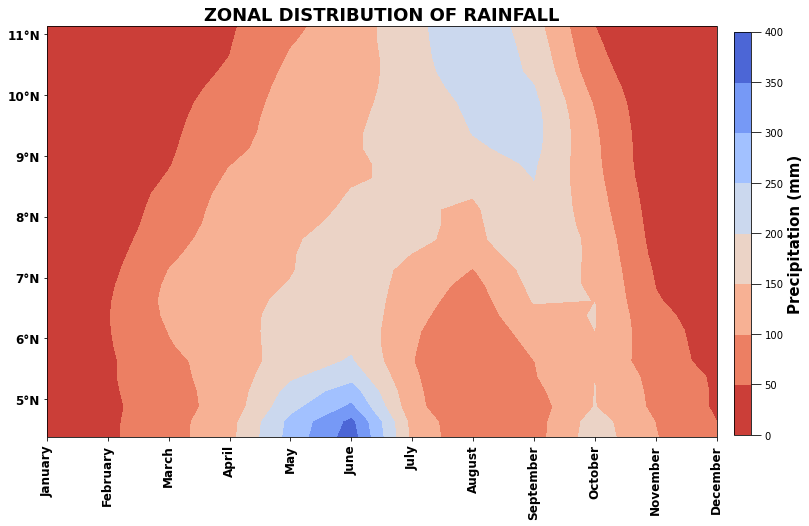

In [29]:
fig, axes = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 8))
#plt.subplots_adjust(right = 0.95)

month = ['January', 'February', 'March', 'April','May', 'June', 'July', 
                 'August', 'September', 'October','November', 'December']

ylabels = (['11','10','9','8','7','6','5'])
###############################################################

z = axes.contourf(mm['month'], mm['lat'], mm,
                      transform=ccrs.PlateCarree(), cmap = 'coolwarm_r')
#################################

axes.set_yticks([11,10,9,8,7,6,5])
axes.set_xticks([1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

axes.set_xticklabels(month, rotation = 90, fontsize = 12, fontweight = 'bold')
axes.set_yticklabels(ylabels, fontsize = 12, fontweight = 'bold')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
#axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)
      

#cbar_ax = fig.add_axes([0.16, 0.06, 0.6, 0.02])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar=fig.colorbar(z, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(size=10)
#cbar2.set_ticks([])
cbar.set_label( label = 'Precipitation (mm)',size=15,weight='bold')

    
axes.set_title('ZONAL DISTRIBUTION OF RAINFALL', fontweight = "bold", fontsize = 18)

#plt.savefig('zonal_precip.pdf')
#plt.savefig('zonal_precip.png')
#plt.savefig('zonal_precip.jpg')

In [22]:
#contourf([X, Y,] Z, [levels], **kwargs)


### SPATIAL DISTRIBUTION OF RAINFALL

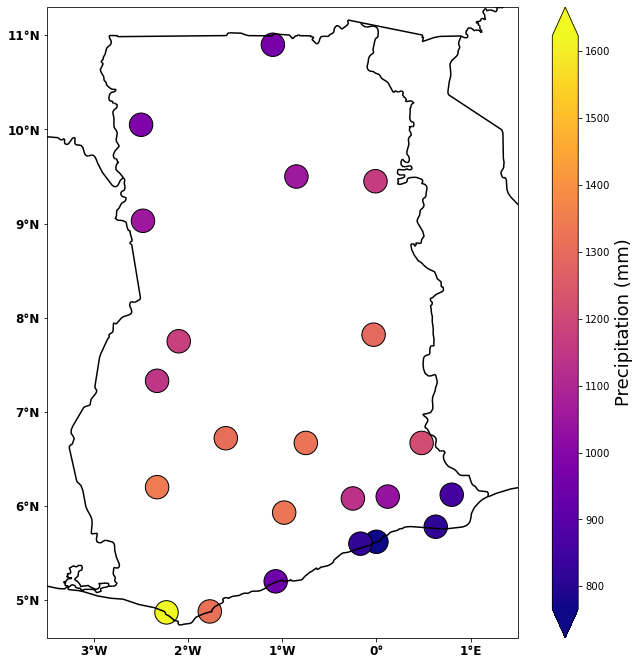

In [31]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
x = Rainfall_stations.mean()
data = pd.DataFrame(x)
data.columns = ['Rainfall']
############################################################


fig, axes = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 12))
plt.subplots_adjust(bottom=0.15, right=0.75, wspace=0.35, hspace=0.5)
axes.coastlines(lw=1.5)
axes.add_feature(cf.BORDERS,lw=1.5)
axes.set_extent([-3.5, 1.5, 4.6,11.3])
xlabels = (['-3','-2','-1','0','1'])
ylabels = (['5','6','7','8','9','10','11'])
###############################################################

cb = axes.scatter(gauge['lon'], gauge['lat'], s=550, c=data[
'Rainfall'], cmap='plasma', edgecolor ='k')#,
                  #vmin=10, vmax=1600)

##############################################################
axes.set_yticks([11,10,9,8,7,6,5])
axes.set_xticks([-3,-2,-1,0,1])

axes.set_xticklabels(xlabels, fontsize = 12, fontweight = 'bold')
axes.set_yticklabels(ylabels, fontsize = 12, fontweight = 'bold')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)

axes.set_xlabel("Longitude", fontsize = 12, fontweight = 'bold')
axes.set_ylabel('Latitude', fontsize = 12, fontweight = 'bold')
#clr_bar = fig.add_axes([0.85, 0.2, 0.02, 0.7])
clr_bar = fig.add_axes([0.75, 0.15, 0.03, 0.73])
    
fig.colorbar(cb, cax=clr_bar,orientation = 'vertical',extend = 'both').set_label('Precipitation (mm)', size = 18)
#axes.set_title('ANNUAL RAINFALL DISTRIBUTION', fontweight = "bold", fontsize = 15)

#axes.set_title('ANNUAL RAINFALL DISTRIBUTION', fontweight = "bold", fontsize = 15)

#save 
#plt.savefig('Mean_Annual_Rainfall.jpg')
#plt.savefig('Mean_Annual_Rainfall.pdf')
#plt.savefig('Mean_Annual_Rainfall.png')

Building RAI function
---

In [32]:
#Rainfall Anomaly Index Function

def RAI(data, dimension):
    overall_mean = data.mean(dimension)     #overall mean in the formula is N_bar
    
   
    anomaly = data - overall_mean    #the anomaly will be given by difference b/n each value of rainfall in 
                                     #the data array and the overll_mean
                                     #the anomaly in the formula the the N-N_bar(numerator)   
    
    
    sortings = data.reduce(np.sort,dim=dimension)  
    
    
    da_lowest_10 = sortings[:10].mean(dimension)    #this will give the mean of 10 lowest yearly/monthly precip
                                                    #the da_lowest in the formula is X_bar
        
        
    da_highest_10 = sortings[:-10:-1].mean(dimension) #this will give the mean of 10 highest yearly/monthly precip
                                                      #the da_lowest in the formula is M_ba
    
    
    negatives = -3*( (anomaly.where(anomaly<0)) / (da_lowest_10-overall_mean) ) #if the anomalies gives negative values
                                                                                #this formula should be used 
    
    
    positives = 3*( (anomaly.where(anomaly>0)) / (da_highest_10-overall_mean) ) #if the anomalies gives positive values,
                                                                                #this formula should be used
    
    
    RAI = anomaly.where(anomaly>=0, negatives).where(anomaly<0, positives)   # after all the calculation, both the 
                                                                                #negatve and positives anomalies index 
                                                                             # will be put together and assigned to RAI
    
    return RAI

In [33]:
#Rainfall Anomaly Index Function
class drought_indices:
    def open_file(path='E:/DATASETS', data=None, fname='/precip.mon.mean.nc'):
        file = xr.open_dataset(path+data.upper()+fname)
        return file

    def RAI_XD(data, dimension):
        overall_mean = data.mean(dimension) 
        stsdg= data.std() #overall mean in the formula is N_bar
        anomaly = data - overall_mean    #the anomaly will be given by difference b/n each value of rainfall in 
                                         #the data array and the overll_mean
                                         #the anomaly in the formula the the N-N_bar(numerator)   
        sortings = data.reduce(np.sort,dim=dimension)  
        da_lowest_10 = sortings[:10].mean(dimension)    #this will give the mean of 10 lowest yearly/monthly precip
                                                        #the da_lowest in the formula is X_bar
        da_highest_10 = sortings[:-10:-1].mean(dimension) #this will give the mean of 10 highest yearly/monthly precip
                                                          #the da_lowest in the formula is M_ba
        negatives = -3*( (anomaly.where(anomaly<0)) / (da_lowest_10-overall_mean) ) #if the anomalies gives negative values
                                                                                    #this formula should be used 
        positives = 3*( (anomaly.where(anomaly>0)) / (da_highest_10-overall_mean) ) #if the anomalies gives positive values,
                                                                                    #this formula should be used
        RAI = anomaly.where(anomaly>=0, negatives).where(anomaly<0, positives)   # after all the calculation, both the 
                                     #negatve and positives anomalies index will be put together and assigned to RAI
        return RAI

RAI lookup Table
---


<img src="RAIT.png">




In [34]:
data_names = ['CRU','GPCC','CHIRPS']#era5
filenames = ['cru_ts4.05.1901.2020.pre.dat.nc','GPCC.nc','chirps_new.nc']

In [35]:
RAI_files = ['RAI_'+d for d in data_names]
for i, data in enumerate(data_names[:4]): #Datanames Subsetting Here
    dataset = drought_indices.open_file(path='E:/DATASETS/', data=data, fname='/'+filenames[i])
    if data == 'CRU':
        dataset = dataset.pre.sel(lon=slice(-3.5,1.5), lat=slice(4,12), time=slice('1983','2017'))
    elif data == 'GPCC':
        dataset  = dataset.precip.sel(lon=slice(-3.5,1.5), lat=slice(12,4), time=slice('1981','2019'))
     
    elif data == 'CHIRPS':
        dataset  = dataset.rename({'longitude':'lon','latitude':'lat'}).precip.sel(lon=slice(-3.5,1.5), lat=slice(4,12), time=slice('1983','2017'))

    else:
        dataset = dataset.precip.sel(lon=slice(-3,1.5), lat=slice(4,12), time=slice('1983','2017'))
    dataset = dataset.groupby('time.year').sum('time').rename({'year':'time'})
    RAI_files[i] = drought_indices.RAI_XD(dataset, 'time')

In [39]:
RAI = RAI_files[1]

### Calculating RAI using the RAI function above for 
- monthly time scale
- yearly time scale

In [40]:
#da_monthly_RAI = RAI(da_ghana_monthly_precip, 'time')

In [41]:
#RAI = da_monthly_RAI.groupby('time.year').sum()

### YEARLY RAINFALL ANOMALY INDEX OVER GHANA

In [42]:
 GPCC_RAI =   RAI.where( RAI !=0, drop = True)

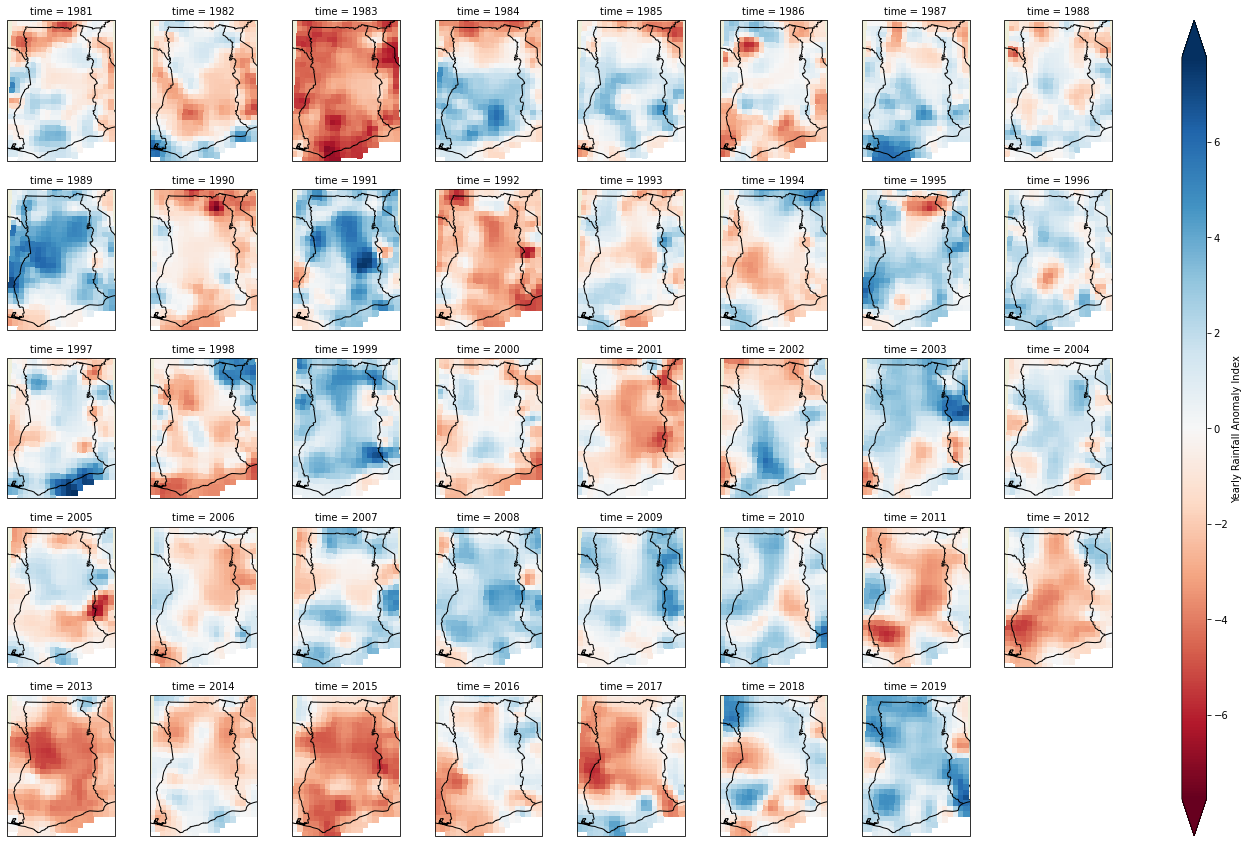

In [43]:
# This is the map projection we want to plot *onto*
map_proj = ccrs.LambertConformal(central_longitude=0, central_latitude=0)

p = GPCC_RAI.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    col="time",
    col_wrap=8,  # multiplot settings
    # for a sensible figsize
    subplot_kws={"projection": map_proj},
    cmap='RdBu',
    cbar_kwargs={'shrink':1.0, 'aspect':30, "label": "Yearly Rainfall Anomaly Index", "extend": "both"})
#,vmax = 3, vmin = -3)  # the plot's projection

# We have to set the map's options on all axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    #ax.add_feature(cf.OCEAN)
    ax.add_feature(cf.LAND, edgecolor='black', lw = 5)
    #ax.add_feature(cf.LAKES, edgecolor='black')    
    ax.set_extent([-3.5, 1.5, 4.6,11.3])
    
#plt.savefig('Yearly_RAI.pdf')
plt.savefig('Yearly_RAI.jpg')

RAI TIMESERIES FOR THE 22 SYNOPTIC STATIONS
---

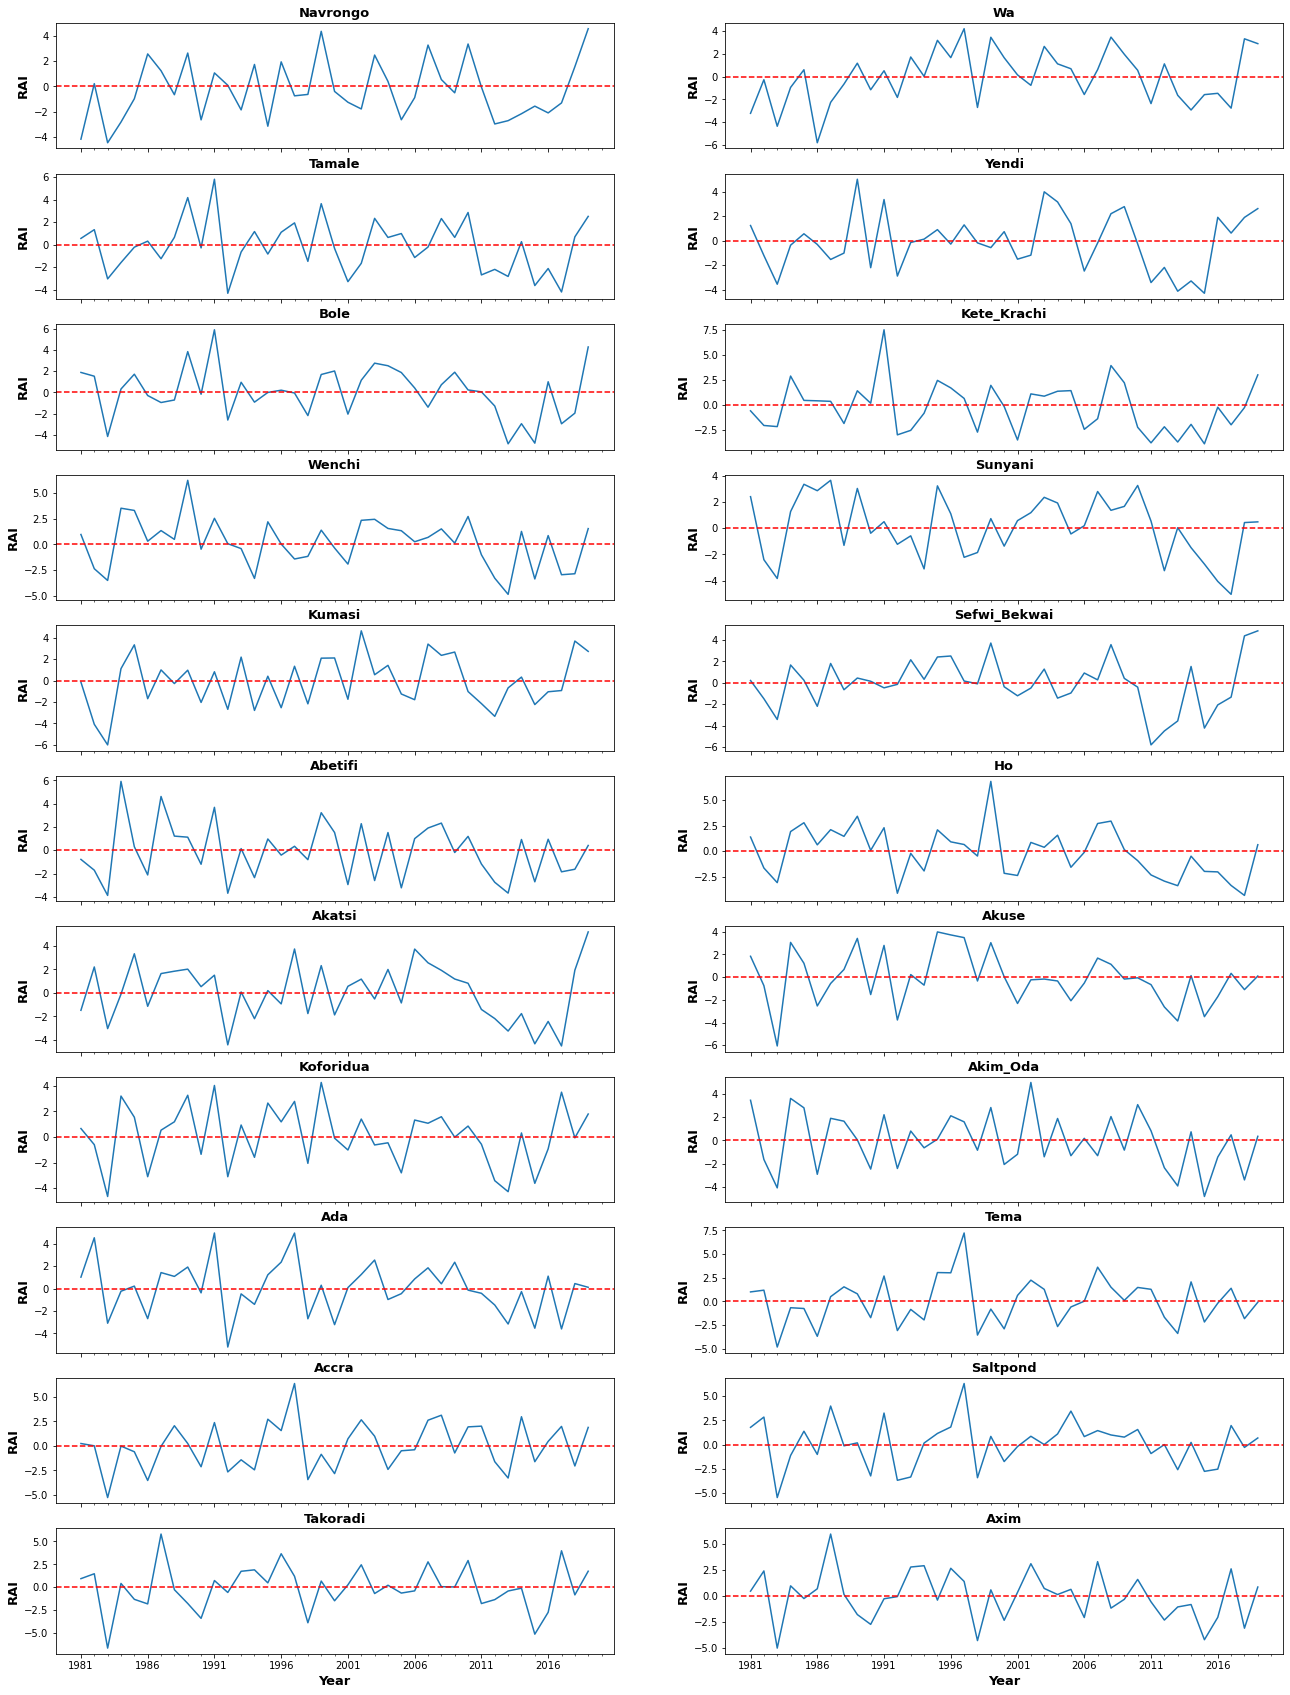

In [45]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St', 'Zone'])
#dat#
ticks = ['1981','1981', '1986','1991','1996', '2001','2006','2011', '2016', '2021', '2021']
fig, axes = plt.subplots(nrows = 11, ncols = 2, figsize=(22,30), sharex=True)
axes[10,0].set_xlabel('Year', fontsize =13, fontweight = 'bold')
axes[10,1].set_xlabel('Year', fontsize =13, fontweight = 'bold')
ax = axes.flatten()
for i in range(22):
    
    station =  gauge.iloc[i,0]
    lon = gauge.iloc[i,1]
    lat = gauge.iloc[i,2]

    RA = GPCC_RAI.sel(lat = lat, lon = lon, method = 'nearest')
    ax[i].plot(RA)
    ax[i].set_title(station, fontsize =13, fontweight = 'bold')
    ax[i].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    #ax[i].axhline(y=2, color='g', linestyle='dashed', alpha=1)
    #ax[i].axhline(y=-2, color='r', linestyle='dashed', alpha=1)
    ax[i].set_xticks(np.arange(1,40),1)
    ax[i].set_xticklabels(ticks)#,rotation=90)
    ax[i].set_ylabel('RAI', fontsize =13, fontweight = 'bold')
    
plt.savefig('RAI_TIMESERIES1.jpg')
#plt.savefig('RAI_TIMESERIES1.pdf')

#### selecting the 22 synoptics stations from the GPCC GRIDDED

In [46]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['Station', 'Longitude', 'Latitude', 'St', 'Zone'])
#dat#
station =  gauge.iloc[:,0]
lon = gauge.iloc[:,1]
lat = gauge.iloc[:,2]

RAI_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')
#CHIRPS_stations = pd.DataFrame(data = pd.date_range(start = '1981',end ='2020', freq ='Y'), columns = ['Year']).set_index('Year')

for i,j in enumerate(lon):
    
    GPCC = RAI_files[1].sel(lat = lat[i], lon = j, method = 'nearest')
    RAI_stations[station[i]] = GPCC
    
   # CHIRPS = RAI_files[1].sel(lat = lat[i], lon = j, method = 'nearest')
    #CHIRPS_stations[station[i]] = CHIRPS


RAI IN THE AGRO-ECOLOGICAL ZONES
---

In [47]:
north = RAI_stations.iloc[:,:5].mean(axis = 1)
trans = RAI_stations.iloc[:,5:8].mean(axis = 1)
forest = RAI_stations.iloc[:,8:16].mean(axis = 1)
coast = RAI_stations.iloc[:,16:22].mean(axis = 1)

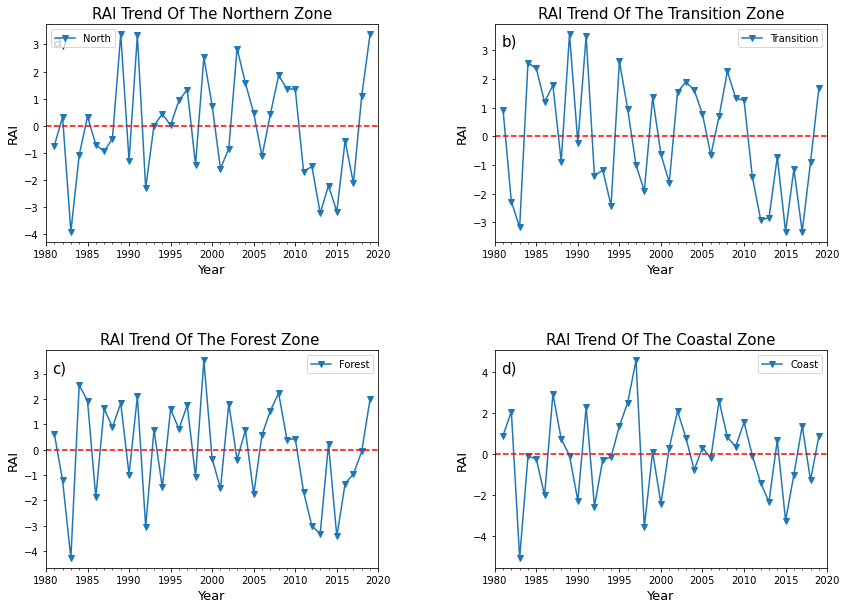

In [49]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(14,10),sharex = False)
#plt.subplots_adjust(bottom=0.05, top=0.95)
plt.subplots_adjust(hspace=0.5, wspace=0.35, )

#axes[0,0].set_ylabel('FOREST \nRAI',fontsize=12, fontweight = "bold")
north.plot(ax = axes[0,0], marker = 'v', label = 'North')
axes[0,0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
axes[0,0].set_title('RAI Trend Of The Northern Zone',fontsize=15)
axes[0,0].text(0.02,0.9, 'a)', transform = axes[0,0].transAxes, fontsize = 15)

trans.plot(ax = axes[0,1], marker = 'v', label = 'Transition')
axes[0,1].axhline(y=0, color='r', linestyle='dashed', alpha=1)
axes[0,1].set_title('RAI Trend Of The Transition Zone',fontsize=15)
axes[0,1].text(0.02,0.9, 'b)', transform = axes[0,1].transAxes, fontsize = 15)


forest.plot(ax = axes[1,0], marker = 'v', label = 'Forest')
axes[1,0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
axes[1,0].set_title('RAI Trend Of The Forest Zone ',fontsize=15)
axes[1,0].text(0.02,0.9, 'c)', transform = axes[1,0].transAxes, fontsize = 15)

coast.plot(ax = axes[1,1], marker = 'v', label = 'Coast')
axes[1,1].axhline(y=0, color='r', linestyle='dashed', alpha=1)
axes[1,1].set_title('RAI Trend Of The Coastal Zone',fontsize=15)
axes[1,1].text(0.02,0.9, 'd)', transform = axes[1,1].transAxes, fontsize = 15)

ax = axes.flatten()
for ax in axes:
    #ax[0].axhline(y=90, color='r', linestyle='dashed', alpha=1)
    #ax[0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    
    
    ax[0].set_ylabel('RAI',fontsize=13)#, fontweight = "bold")
    ax[1].set_ylabel('RAI',fontsize=13)#, fontweight = "bold")
  

    ax[0].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[1].set_xlabel('Year',fontsize = 13)#, fontweight = "bold")
    ax[0].set_xlim('1980','2020')
    ax[1].set_xlim('1980','2020')
    ax[0].legend()
    ax[1].legend()
    
#plt.savefig('RAI_trend.pdf')
#plt.savefig('RAI_trend.jpg')

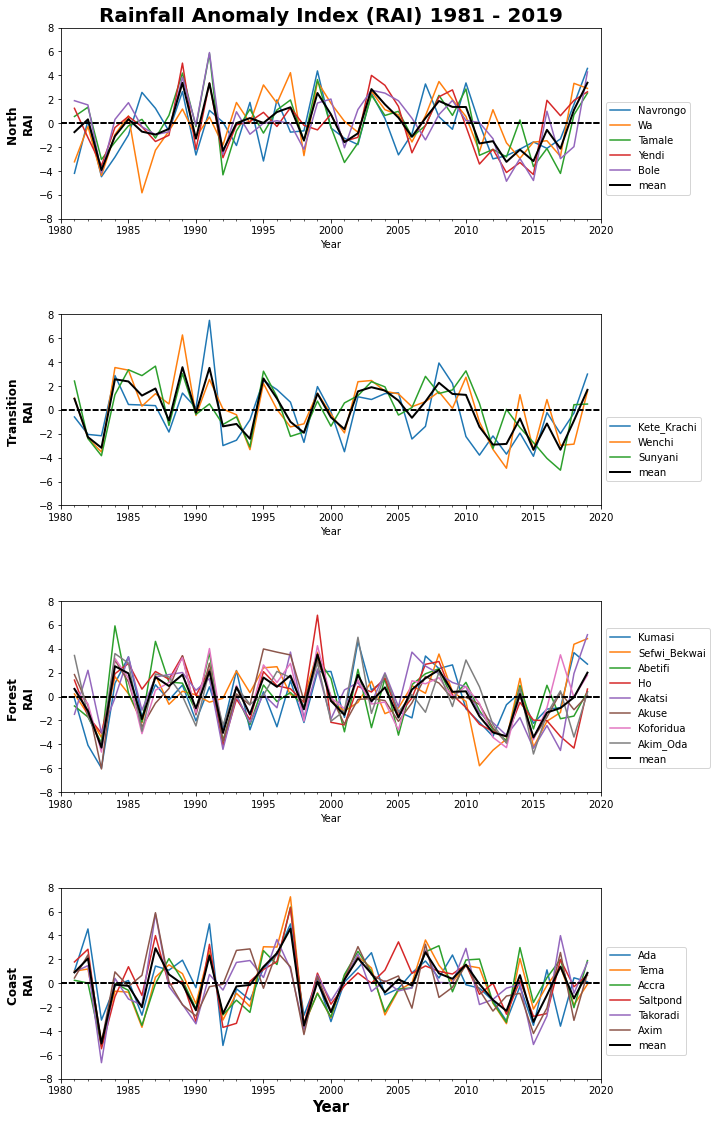

In [50]:
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(12,20))#,sharex = True) #initial size 10,14
plt.subplots_adjust(bottom=0.15, right=0.75, wspace=0.35, hspace=0.5)

#plt.suptitle('Rainfall Anomaly Index (RAI) 1981 - 2019', fontweight = "bold")


for i, zn in enumerate(['N','T','F','C']):
    df1 = gauge[gauge.Zone==zn]
    for stn in df1.Station:
        dat = pd.DataFrame()
        #dat['gauge'] = gauges[stn]
        #dat['cru'] = CRU_stations[stn]
        dat['gpcc'] = RAI_stations[stn]
        #dat['chirps'] = CHIRPS_stations[stn]
        #dat['chirps'] = CHIRPS_stations[stn]
        for j, data in enumerate(dat.columns):
            dat[data].plot(ax= axes[i],label = stn)
            #axes[i,j].set_ylabel('RAI')
            #dat[data].mean(axis).plot(color='k', linewidth=1, ax =axes[i])#, label='Mean')
            
            
            axes[0].set_ylabel('North \nRAI',fontsize=12, fontweight = "bold")
            axes[1].set_ylabel('Transition \nRAI',fontsize=12, fontweight = "bold")
            axes[2].set_ylabel('Forest \nRAI',fontsize=12, fontweight = "bold")
            axes[3].set_ylabel('Coast \nRAI',fontsize=12, fontweight = "bold")
            axes[0].set_title('Rainfall Anomaly Index (RAI) 1981 - 2019', fontweight = "bold", fontsize = 20)
            #axes[0,1].set_title('CRU')
            #axes[0,2].set_title('GPCC')
           #axes[0,3].set_title('CHIRPS')
            
            axes[3].set_xlabel('Year',fontsize = 15, fontweight = "bold")
            axes[i].set_ylim(-8,8)
            axes[i].set_xlim(1980,2020)
            axes[i].axhline(y=0, color='k', linestyle='dashed', alpha=1)
            #axes[i, j].set_xticklabels(dat.index.year,rotation=60)
            axes[i].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))
            

north.plot(color='k', linewidth=2, ax =axes[0], label = 'mean')
trans.plot(color='k', linewidth=2, ax =axes[1], label = 'mean')
forest.plot(color='k', linewidth=2, ax =axes[2], label = 'mean')
coast.plot(color='k', linewidth=2, ax =axes[3], label = 'mean')
#axes[i].set_ylim(-8,8)
axes[0].set_xlim('1980','2020')
axes[0].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))

axes[1].set_xlim('1980','2020')
axes[1].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))

axes[2].set_xlim('1980','2020')
axes[2].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))

axes[3].set_xlim('1980','2020')
axes[3].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))

#plt.savefig('RAI_Line_plot_zones1.pdf')
#plt.savefig('RAI_Line_plot_zones1.png')

In [51]:
#forest = RAI_stations.iloc[:,8:16]
#forest.head(2)

### RAI FOR THE FOREST ZONE

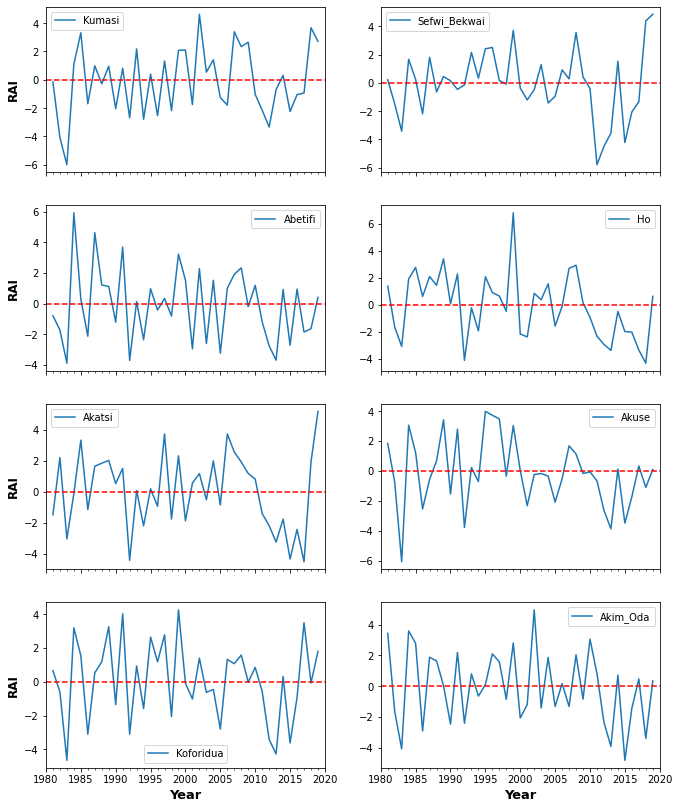

In [52]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(11,14),sharex = True)

axes[0,0].set_ylabel('FOREST \nRAI',fontsize=12, fontweight = "bold")
RAI_stations.iloc[:,8:9].plot(ax = axes[0,0])
RAI_stations.iloc[:,9:10].plot(ax = axes[0,1])
RAI_stations.iloc[:,10:11].plot(ax = axes[1,0])
RAI_stations.iloc[:,11:12].plot(ax = axes[1,1])
RAI_stations.iloc[:,12:13].plot(ax = axes[2,0])
RAI_stations.iloc[:,13:14].plot(ax = axes[2,1])
RAI_stations.iloc[:,14:15].plot(ax = axes[3,0])
RAI_stations.iloc[:,15:16].plot(ax = axes[3,1])
ax = axes.flatten()
for ax in axes:
    ax[1].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    ax[0].axhline(y=0, color='r', linestyle='dashed', alpha=1)
    
    ax[0].set_ylabel('RAI',fontsize=12, fontweight = "bold")
  

    ax[0].set_xlabel('Year',fontsize = 13, fontweight = "bold")
    ax[1].set_xlabel('Year',fontsize = 13, fontweight = "bold")
    ax[0].set_xlim('1980','2020')
    ax[1].set_xlim('1980','2020')
    
#plt.savefig('Forest_zone_RAI.pdf')
#plt.savefig('Forest_zone_RAI.png')

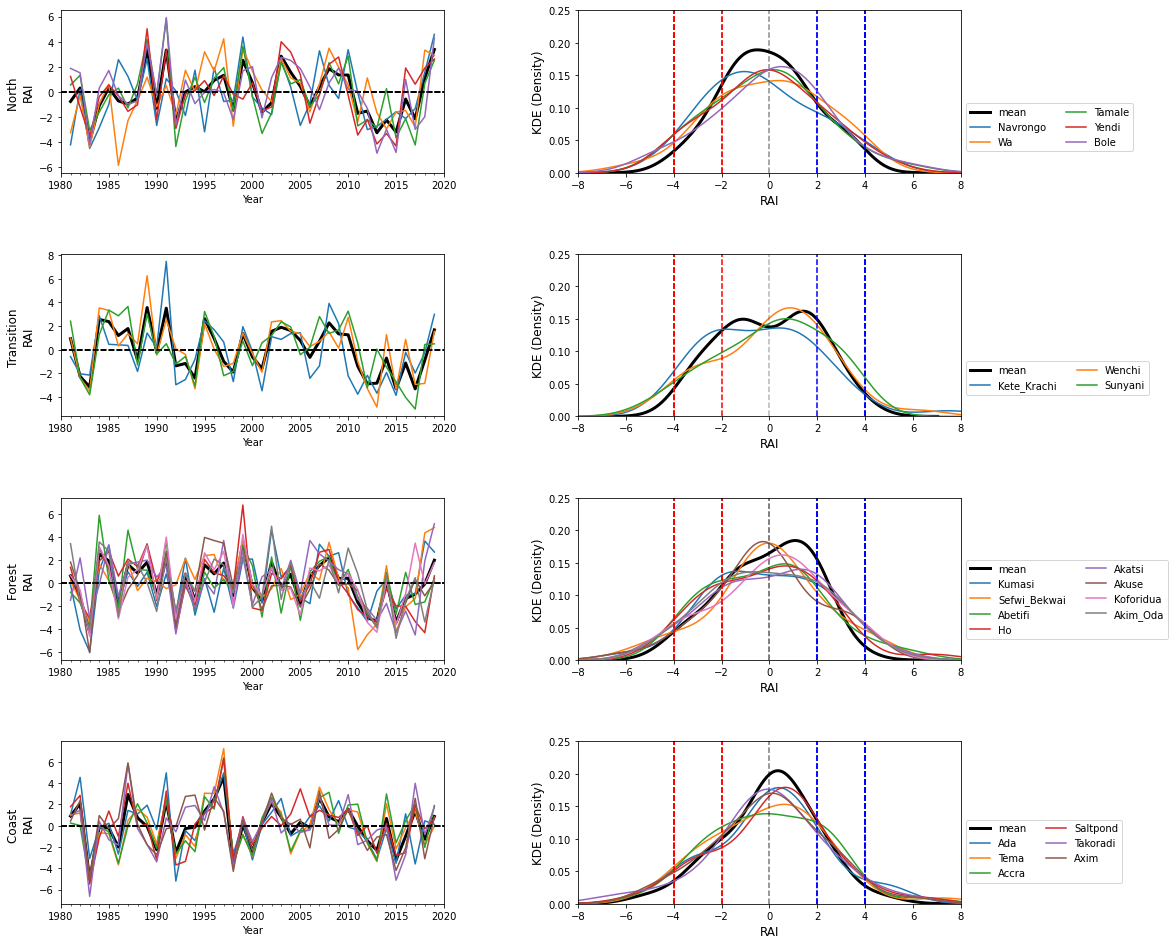

In [55]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20,17))#,sharex = True)
plt.subplots_adjust(bottom=0.15, right=0.75, wspace=0.35, hspace=0.5)


north.plot(color='k', linewidth=3, ax =axes[0,0], label = 'mean')
trans.plot(color='k', linewidth=3, ax =axes[1,0], label = 'mean')
forest.plot(color='k', linewidth=3, ax =axes[2,0], label = 'mean')
coast.plot(color='k', linewidth=3, ax =axes[3,0], label = 'mean')


######################################################################
north.plot(kind = 'kde', color='k', linewidth=3, ax =axes[0,1], label = 'mean')
trans.plot(kind = 'kde', color='k', linewidth=3, ax =axes[1,1], label = 'mean')
forest.plot(kind = 'kde', color='k', linewidth=3, ax =axes[2,1], label = 'mean')
coast.plot(kind = 'kde', color='k', linewidth=3, ax =axes[3,1], label = 'mean')

for i, zn in enumerate(['N','T','F','C']):
    df1 = gauge[gauge.Zone==zn]
    for stn in df1.Station:
        dat = pd.DataFrame()
        
        dat['gpcc'] = RAI_stations[stn]
        #dat['chirps'] = CHIRPS_stations[stn]
        #dat['chirps'] = CHIRPS_stations[stn]
        for j, data in enumerate(dat.columns):
            dat[data].plot(ax= axes[i,0],label = stn)
            #axes[i,j].set_ylabel('RAI')
            #dat.mean(axis=1).plot(color='k', linewidth=1, ax =axes[i, j], label='Mean')
            
            
            axes[0,0].set_ylabel('North \nRAI',fontsize=12)
            axes[1,0].set_ylabel('Transition \nRAI',fontsize=12)
            axes[2,0].set_ylabel('Forest \nRAI',fontsize=12)
            axes[3,0].set_ylabel('Coast \nRAI',fontsize=12)
            
            #axes[i, j].set_xlabel('Year')
            #axes[i, j].set_ylim(-8,8)
            axes[i,0].set_xlim('1980','2020')
            axes[i,0].axhline(y=0, color='k', linestyle='dashed', alpha=1)
            #axes[i].set_xticklabels(rotation=60)
            #axes[i,1].legend(loc= 'lower left', ncol=1, bbox_to_anchor=(1, 0.1))
            
            
            
            a = dat[data].plot(kind = 'kde', legend=False, ax=axes[i, 1], label = stn)
            #dat[data].median(dat['gpcc']).plot(kind = 'kde', color='k', linewidth=2, legend=False, ax=axes[i, 1], label='Mean')
            axes[i, 1].set_xlabel('RAI', fontsize=12)
            axes[i, 1].set_ylabel('KDE (Density)', fontsize=12)
            axes[i, 1].set_xlim(-8,8)
            axes[i, 1].set_ylim(0,0.25)
            axes[i, 1].set_xticks(np.arange(-8,8.1,2))
            axes[i, 1].legend(loc=0, ncol=2, bbox_to_anchor=(1, 0.1))

            #### (Normal)
            axes[i, 1].axvline(x=0, color='k', linestyle='dashed', alpha=0.1)

            axes[i, 1].axvline(x=-2, color='r', linestyle='dashed', alpha=0.5)
            axes[i, 1].axvline(x=-4, color='r', linestyle='dashed', alpha=1)

            axes[i, 1].axvline(x=2, color='b', linestyle='dashed', alpha=0.5)
            axes[i, 1].axvline(x=4, color='b', linestyle='dashed', alpha=1)



                  
#plt.savefig('RAI_Line_and_KDE_plot.pdf')
#plt.savefig('RAI_Line_and_KDE_plot.png')
#plt.savefig('RAI_Line_and_KDE_plot.jpg')

BOX PLOTS
--

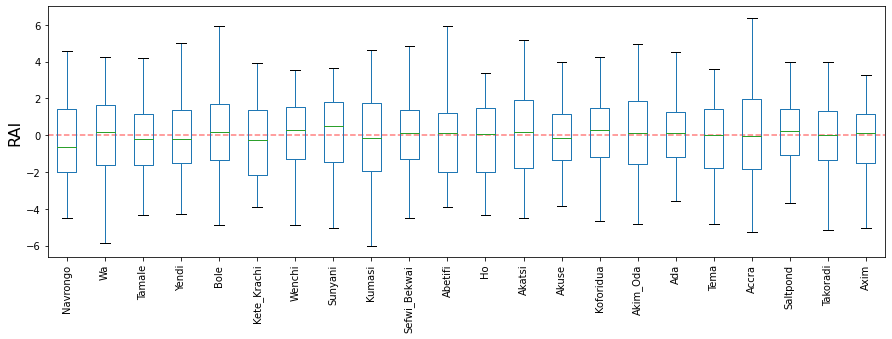

In [57]:
fig, ax = plt.subplots(figsize=(15,6))
plt.subplots_adjust(bottom=0.3)
plt.axhline(y=0, color='r', linestyle='dashed', alpha=0.5)
RAI_stations.plot.box(ax = ax, showfliers=False, rot=90)
plt.ylabel('RAI', fontsize=16)
#plt.savefig('RAI_box-whisker.pdf')
#plt.savefig('RAI_box-whisker.jpg')
#plt.savefig('RAI_box-whisker.png')

#### FLOOD AND DROUGHT EVENTS COUNT (%)


In [59]:
extreme_drought = RAI_stations.where(RAI_stations<=-4).count(axis=0) / RAI_stations.count(axis=0)
dry = (RAI_stations.where(RAI_stations<=-2).count(axis=0) / RAI_stations.count(axis=0)) - extreme_drought


extreme_flood = RAI_stations.where(RAI_stations>=4).count(axis=0) / RAI_stations.count(axis=0)
flood = (RAI_stations.where(RAI_stations>=2).count(axis=0) / RAI_stations.count(axis=0)) - extreme_flood

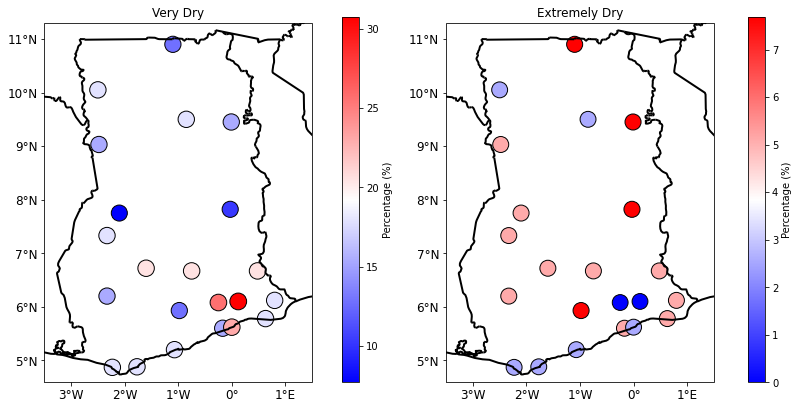

In [43]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
locators = gauge.sort_values('station')

variables = [dry, extreme_drought]#, flood, extreme_flood]
#maximums = [25, 8, 25, 8]
fig, axes = plt.subplots(ncols=2, nrows=1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 8))
plt.subplots_adjust(wspace = 0.5)
count = 0
xlabels = (['-3','-2','-1','0','1'])
ylabels = (['5','6','7','8','9','10','11'])
labels = ['Very Dry','Extremely Dry','Very Humid','Extremely Humid']
for ax in axes:
    #for ax in axis:
    ax.coastlines(lw=2)
    ax.add_feature(cf.BORDERS,lw=2)
    ax.set_extent([-3.5, 1.5, 4.6,11.3])
    ax.set_xticks([-3,-2,-1,0,1])
    ax.set_yticks([11,10,9,8,7,6,5])
    ax.set_xticklabels(xlabels, fontsize = 12)#, fontweight = 'bold')
    ax.set_yticklabels(ylabels, fontsize = 12)#, fontweight = 'bold')
    
    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter) 
    
    
    
    #variables[count].plot.scatter(x=locators['lon'], y=locators['lat'])
    cb = ax.scatter(locators['lon'], locators['lat'], 
                    s=250+(variables[count]*100), c=variables[count]*100, cmap='bwr',
                   edgecolor='k')
    #ax.set_colorbar()
    ax.set_title(labels[count])
    
    
    if count<2:
        cax = fig.add_axes([0.94/(2-(count%2)), 0.19, 0.019, 0.635])
    else:
        cax = fig.add_axes([0.9/(2-(count%2)), 0.265, 0.02, 0.545])

    fig.colorbar(cb, cax=cax, orientation='vertical', label="Percentage (%)")
    #count+=1

#    for lg, lt, name in zip(gauge.lon, gauge.lat, n_stations):
#        if name in ['15', '19','12','4','6']:
#            ax.text(lg - .05, lt + .05, 
#                    name, color = 'yellow',
#                    va='center', 
#                    ha='left', transform=ccrs.Geodetic(), fontsize= 12, fontweight = 'bold')
#        else:    
#            ax.text(lg + .05, lt + .05, 
#                    name,color = 'k',
#                    va='center', 
#                    ha='right', transform=ccrs.Geodetic(), fontsize= 12, fontweight = 'bold')
    count+=1

#clr_bar = fig.add_axes([0.95, 0.265, 0.02, 0.475]
    
#fig.colorbar(cb, cax=clr_bar).set_label('Percentage (%)', size = 20)
    #plt.savefig('Gauge_Drought-and-Flood-Events.pdf')
    #plt.savefig('Gauge_Drought-and-Flood-Events.png')

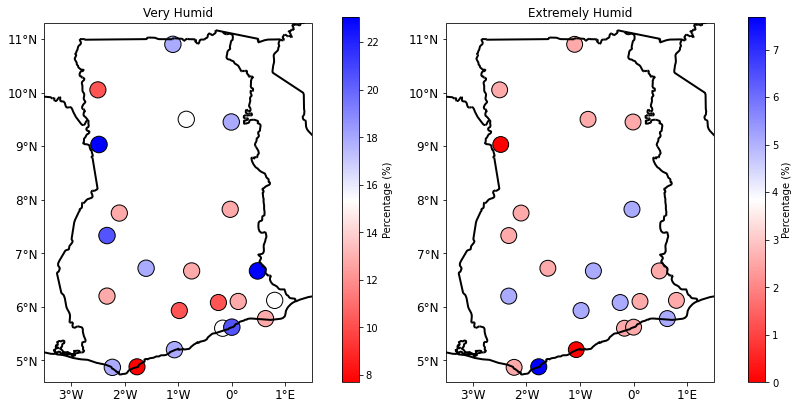

In [44]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
locators = gauge.sort_values('station')

variables = [flood, extreme_flood]
#maximums = [25, 8, 25, 8]
fig, axes = plt.subplots(ncols=2, nrows=1, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 8))
plt.subplots_adjust(wspace = 0.5)
count = 0
labels = ['Very Humid','Extremely Humid']
for ax in axes:
    #for ax in axis:
    ax.coastlines(lw=2)
    ax.add_feature(cf.BORDERS,lw=2)
    ax.set_extent([-3.5, 1.5, 4.6,11.3])
    ax.set_xticks([-3,-2,-1,0,1])
    ax.set_yticks([11,10,9,8,7,6,5])
    ax.set_xticklabels(xlabels, fontsize = 12)#, fontweight = 'bold')
    ax.set_yticklabels(ylabels, fontsize = 12)#, fontweight = 'bold')
    
    
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter) 
    
    
    
    
    #variables[count].plot.scatter(x=locators['lon'], y=locators['lat'])
    cb = ax.scatter(locators['lon'], locators['lat'], 
                    s=250+(variables[count]*100), c=variables[count]*100, cmap='bwr_r',
                   edgecolor='k')
    #ax.set_colorbar()
    ax.set_title(labels[count])

    if count<2:
        cax = fig.add_axes([0.94/(2-(count%2)), 0.19, 0.019, 0.635])
    else:
        cax = fig.add_axes([0.9/(2-(count%2)), 0.265, 0.02, 0.545])

    fig.colorbar(cb, cax=cax, orientation='vertical', label="Percentage (%)")
    
    
#    for lg, lt, name in zip(gauge.lon, gauge.lat, n_stations):
#        if name in ['15', '19','12','4','6']:
#            ax.text(lg - .05, lt + .05, 
#                    name, color = 'yellow',
#                    va='center', 
#                    ha='left', transform=ccrs.Geodetic(), fontsize= 12, fontweight = 'bold')
#        else:    
#            ax.text(lg + .05, lt + .05, 
#                    name,color = 'k',
#                    va='center', 
#                    ha='right', transform=ccrs.Geodetic(), fontsize= 12, fontweight = 'bold')

    count+=1
    
#clr_bar = fig.add_axes([0.95, 0.265, 0.02, 0.475])
    
#fig.colorbar(cb, cax=clr_bar).set_label('Percentage (%)', size = 20)
    #plt.savefig('Gauge_Drought-and-Flood-Events.pdf')
    #plt.savefig('Gauge_Drought-and-Flood-Events.png')

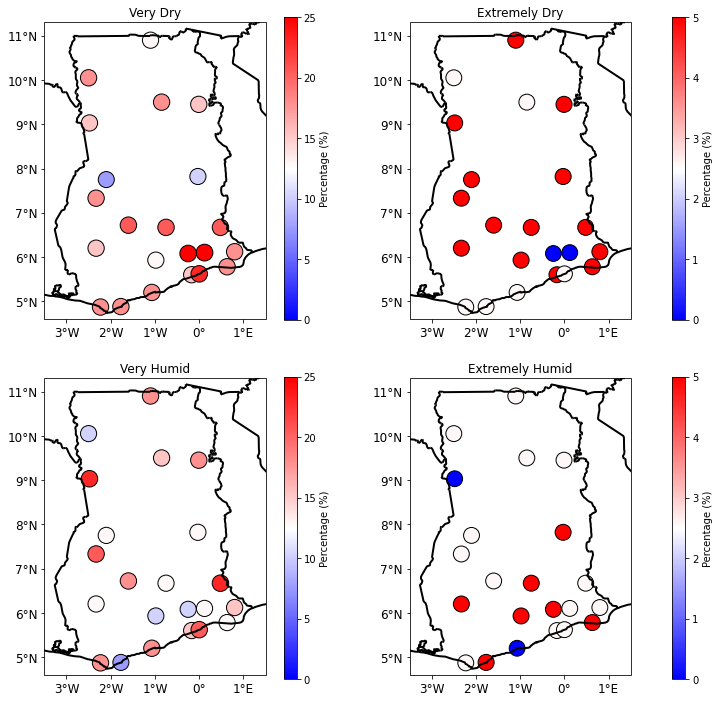

In [45]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
locators = gauge.sort_values('station')

variables = [dry, extreme_drought, flood, extreme_flood]
labels = ['Very Dry','Extremely Dry','Very Humid','Extremely Humid']
maximums = [25, 5, 25, 5]
fig, axes = plt.subplots(ncols=2, nrows=2, subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(12, 12))
count = 0
for axis in axes:
    for ax in axis:
        ax.coastlines(lw=2)
        ax.add_feature(cf.BORDERS,lw=2)
        ax.set_extent([-3.5, 1.5, 4.6,11.3])
        ax.set_xticks([-3,-2,-1,0,1])
        ax.set_yticks([11,10,9,8,7,6,5])
        ax.set_xticklabels(xlabels, fontsize = 12)#, fontweight = 'bold')
        ax.set_yticklabels(ylabels, fontsize = 12)#, fontweight = 'bold')


        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)        
        
        #variables[count].plot.scatter(x=locators['lon'], y=locators['lat'])
        cb = ax.scatter(locators['lon'], locators['lat'], 
                        s=250+(variables[count]*100), c=variables[count]*100, cmap='bwr',
                        vmin=0, vmax=maximums[count], edgecolor='k')
        #ax.set_colorbar()
        ax.set_title(labels[count])

        if count<2:
            cax = fig.add_axes([0.9/(2-(count%2)), 0.536, 0.015, 0.35])
        else:
            cax = fig.add_axes([0.9/(2-(count%2)), 0.12, 0.015, 0.35])
            
        fig.colorbar(cb, cax=cax, orientation='vertical', label="Percentage (%)")
        count+=1
        
#plt.savefig('Gauge_Drought-and-Flood-Events.pdf')
#plt.savefig('Gauge_Drought-and-Flood-Events.png')

In [47]:
extreme_drought = RAI_stations.where(RAI_stations<=-4).count(axis=0) / RAI_stations.count(axis=0)
dry = (RAI_stations.where(RAI_stations<=-2).count(axis=0) / RAI_stations.count(axis=0))# - extreme_drought


extreme_flood = RAI_stations.where(RAI_stations>=4).count(axis=0) / RAI_stations.count(axis=0)
flood = (RAI_stations.where(RAI_stations>=2).count(axis=0) / RAI_stations.count(axis=0))# - extreme_flood

In [48]:
flood= flood*100

Text(0.5, 1.0, 'FLOOD EVENTS')

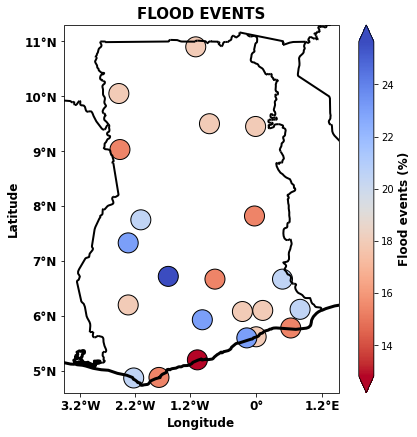

In [49]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
#x = Rainfall_stations.mean()
data = pd.DataFrame(flood)
data.columns = ['flood']
############################################################


fig, axes = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(7, 7))
plt.subplots_adjust(bottom=0.15, right=0.75, wspace=0.35, hspace=0.5)
axes.coastlines(lw=3)
axes.add_feature(cf.BORDERS,lw=2)
axes.set_extent([-3.5, 1.5, 4.6,11.3])
xlabels = (['-3','-2','-1','0','1'])
ylabels = (['5','6','7','8','9','10','11'])
count = 0
###############################################################

cb = axes.scatter(gauge['lon'], gauge['lat'], s=400, c=data[
'flood'], cmap='coolwarm_r', edgecolor ='k')#,
                  #vmin=10, vmax=1600)

##############################################################
axes.set_yticks([11,10,9,8,7,6,5])
axes.set_xticks([-3.2,-2.2,-1.2,0,1.2])

axes.set_xticklabels(xlabels, fontsize = 12, fontweight = 'bold')
axes.set_yticklabels(ylabels, fontsize = 12, fontweight = 'bold')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)

axes.set_xlabel("Longitude", fontsize = 12, fontweight = 'bold')
axes.set_ylabel('Latitude', fontsize = 12, fontweight = 'bold')
clr_bar = fig.add_axes([0.75, 0.15, 0.03, 0.73])
#clr_bar = fig.add_axes([0.75, 0.28, 0.02, 0.46])
    
cbar = fig.colorbar(cb, cax=clr_bar,  extend = 'both').set_label('Flood events (%)', size = 12, weight='bold')
axes.set_title('FLOOD EVENTS', fontweight = "bold", fontsize = 15)

#plt.savefig('Flood_count.pdf')
#plt.savefig('Flood.pdf')
#plt.savefig('Flood_count.jpg')

Text(0.5, 1.0, 'DROUGHT EVENTS')

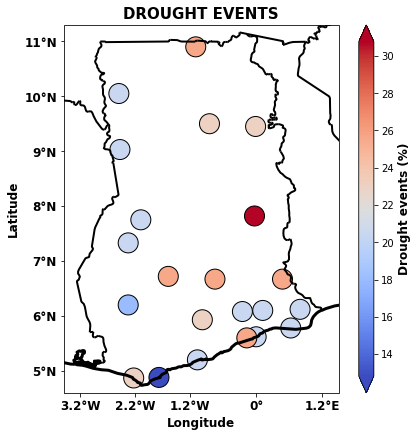

In [52]:
gauge = pd.read_fwf('E:/DATASETS/GMet_location_avgSI.txt', names = ['station', 'lon', 'lat', 'St', 'Zone'])
d = dry*100
data = pd.DataFrame(d)
data.columns = ['drought']
############################################################

fig, axes = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(7, 7))
plt.subplots_adjust(bottom=0.15, right=0.75, wspace=0.35, hspace=0.5)
axes.coastlines(lw=3)
axes.add_feature(cf.BORDERS,lw=2)
axes.set_extent([-3.5, 1.5, 4.6,11.3])
xlabels = (['-3','-2','-1','0','1'])
ylabels = (['5','6','7','8','9','10','11'])
count = 0
###############################################################

cb = axes.scatter(gauge['lon'], gauge['lat'], s=400, c=data[
'drought'], cmap='coolwarm', edgecolor ='k')#,
                  #vmin=10, vmax=1600)

##############################################################
axes.set_yticks([11,10,9,8,7,6,5])
axes.set_xticks([-3.2,-2.2,-1.2,0,1.2])

axes.set_xticklabels(xlabels, fontsize = 12, fontweight = 'bold')
axes.set_yticklabels(ylabels, fontsize = 12, fontweight = 'bold')

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
axes.xaxis.set_major_formatter(lon_formatter)
axes.yaxis.set_major_formatter(lat_formatter)

axes.set_xlabel("Longitude", fontsize = 12, fontweight = 'bold')
axes.set_ylabel('Latitude', fontsize = 12, fontweight = 'bold')
clr_bar = fig.add_axes([0.75, 0.15, 0.03, 0.73])
#clr_bar = fig.add_axes([0.75, 0.28, 0.02, 0.46])
    
cbar = fig.colorbar(cb, cax=clr_bar,  extend = 'both').set_label('Drought events (%)', size = 12, weight='bold')
axes.set_title('DROUGHT EVENTS', fontweight = "bold", fontsize = 15)



In [54]:
len(flood)

22

------------------------------
---------------------------------------------------------------------------------------------
-----------------------------------------------

THE END
---

---------------------------------
-------------------------------------

.

.

#### BOX PLOT